In [2]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
t_train = pd.read_csv(r'G:\Study Material\Data Science\KAGGLE Competitions\train.csv')
t_test = pd.read_csv(r'G:\Study Material\Data Science\KAGGLE Competitions\test.csv')
Titanice = [t_train, t_test]

In [8]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
t_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
t_train.info()
print('-'*50)
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

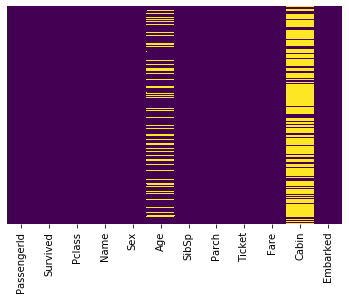

In [14]:
sns.heatmap(t_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

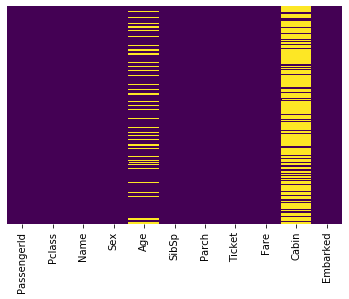

In [15]:
sns.heatmap(t_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
a=t_train[t_train['Pclass']==1]['Age'].median()

b=t_train[t_train['Pclass']==2]['Age'].median()

c=t_train[t_train['Pclass']==3]['Age'].median()

print (a,b,c)

37.0 29.0 24.0


In [20]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [21]:
t_train['Age'] = t_train[['Age','Pclass']].apply(fill_age,axis=1)

In [22]:
d=t_test[t_test['Pclass']==1]['Age'].median()

e=t_test[t_test['Pclass']==2]['Age'].median()

f=t_test[t_test['Pclass']==3]['Age'].median()

print (d,e,f)

42.0 26.5 24.0


In [23]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 26

        else:
            return 24

    else:
        return Age

In [24]:
t_test['Age'] = t_test[['Age','Pclass']].apply(input_age,axis=1)

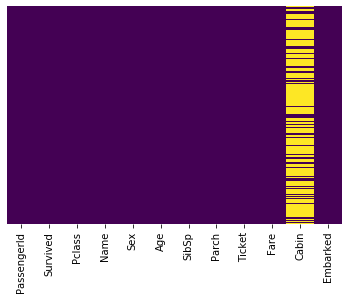

In [25]:
sns.heatmap(t_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

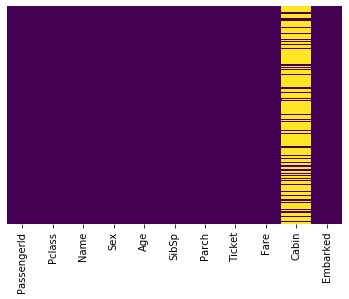

In [26]:
sns.heatmap(t_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
t_train.drop('Cabin',axis=1,inplace=True)

In [28]:
t_test.drop('Cabin',axis=1,inplace=True)

In [29]:
t_train.dropna(inplace=True)

In [30]:
t_test.dropna(inplace=True)

In [31]:
t_train.info()
print('-'*50)
t_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null object
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null object
Fare           41

In [32]:
train_sex = pd.get_dummies(t_train['Sex'] ,drop_first=True)

In [33]:
train_embark = pd.get_dummies(t_train['Embarked'],drop_first=True)

In [35]:
t_train = pd.concat([t_train,train_sex,train_embark],axis=1)

In [36]:
test_sex = pd.get_dummies(t_test['Sex'] ,drop_first=True)

In [37]:
test_embark = pd.get_dummies(t_test['Embarked'],drop_first=True)

In [38]:
t_test = pd.concat([t_test,test_sex,test_embark],axis=1)

In [40]:
t_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [41]:
t_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [42]:
t_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [43]:
t_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [44]:
t_train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [45]:
t_test.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [47]:
t_train.shape,t_test.shape

((889, 10), (417, 9))

In [48]:
from sklearn.model_selection import train_test_split

In [54]:
#x_train = t_train.drop('Survived',axis=1)
#y_train = t_train['Survived']
#x_test  = t_test.drop("PassengerId", axis=1)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(t_train.drop('Survived',axis=1), 
                                                    t_train['Survived'],
                                                    test_size=0.30, 
                                                    random_state=101)

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
y_pred = logmodel.predict(x_test)
acc_log = round(logmodel.score(x_train, y_train) * 100, 2)
acc_log

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.06

In [84]:
import xgboost as xgb

train_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
train_model.fit(x_train, y_train)
xgb = round(train_model.score(x_test,y_test)*100,2)
xgb



84.27

In [85]:
from sklearn.ensemble import AdaBoostRegressor
train_model = AdaBoostRegressor()
train_model.fit(x_train, y_train)
AdaBoost = round(train_model.score(x_test,y_test)*100,2)
AdaBoost

47.32

In [88]:
from sklearn.svm import SVC
train_model = SVC()
train_model.fit(x_train,y_train)
SVC = round(train_model.score(x_test,y_test)*100, 2)
SVC

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


60.67

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
train_grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
train_grid.fit(x_train,y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [90]:
train_grid_predictions = train_grid.predict(x_test)
GridSearchCV = round(train_grid.score(x_test,y_test)*100,2)
GridSearchCV

63.3

In [92]:
from sklearn.tree import DecisionTreeClassifier
train_dtree = DecisionTreeClassifier()
train_dtree.fit(x_train,y_train)
predictions = train_dtree.predict(x_test)
DecisionTree = round(train_dtree.score(x_test,y_test)*100,2)
DecisionTree

74.91

In [95]:
from sklearn.ensemble import RandomForestClassifier
train_rfc = RandomForestClassifier(n_estimators=600)
train_rfc.fit(x_train,y_train)
predictions = train_rfc.predict(x_test)
RFC= round(train_rfc.score(x_test,y_test)*100, 2)
RFC

84.27

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

80.71

In [70]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

79.42

In [71]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

62.86

In [73]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


77.97

In [96]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Naive Bayes', 'Perceptron', 
               'Linear SVC', 'XG-Boost','Ada-Boost', 'SVC',
             'Grid Search CV', 'Decision Tree', 'Random Forest'],
    'Score': [acc_knn, acc_log, 
              acc_gaussian, acc_perceptron, 
              acc_linear_svc, xgb, AdaBoost, SVC, GridSearchCV,
             DecisionTree, RFC]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,XG-Boost,84.27
10,Random Forest,84.27
0,KNN,80.71
1,Logistic Regression,80.06
2,Naive Bayes,79.42
4,Linear SVC,77.97
9,Decision Tree,74.91
8,Grid Search CV,63.30
3,Perceptron,62.86
7,SVC,60.67
